In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-depression-machine-learning-challenge/sample_submission.csv
/kaggle/input/predicting-depression-machine-learning-challenge/train.csv
/kaggle/input/predicting-depression-machine-learning-challenge/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/train.csv')
test = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/test.csv')

In [3]:
train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [4]:
test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [5]:
duplicates = train[train.duplicated()]
duplicates

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [6]:
describe = pd.DataFrame(index=train.columns.to_list())
describe['data type'] = train.dtypes
describe['count'] = train.count()
describe['unique'] = train.nunique()
describe['null'] = train.isnull().sum()
describe

,data type,count,unique,null
id,int64,140700,140700,0
Name,object,140700,422,0
Gender,object,140700,2,0
Age,float64,140700,43,0
City,object,140700,98,0
Working Professional or Student,object,140700,2,0
Profession,object,104070,64,36630
Academic Pressure,float64,27897,5,112803
Work Pressure,float64,112782,5,27918
CGPA,float64,27898,331,112802


In [8]:
train.describe().round(2)


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.00,140700.00,27897.00,112782.00,27898.00,27897.00,112790.00,140700.00,140696.00,140700.00
mean,70349.50,40.39,3.14,3.00,7.66,2.94,2.97,6.25,2.99,0.18
std,40616.74,12.38,1.38,1.41,1.46,1.36,1.42,3.85,1.41,0.39
min,0.00,18.00,1.00,1.00,5.03,1.00,1.00,0.00,1.00,0.00
25%,35174.75,29.00,2.00,2.00,6.29,2.00,2.00,3.00,2.00,0.00
50%,70349.50,42.00,3.00,3.00,7.77,3.00,3.00,6.00,3.00,0.00
75%,105524.25,51.00,4.00,4.00,8.92,4.00,4.00,10.00,4.00,0.00
max,140699.00,60.00,5.00,5.00,10.00,5.00,5.00,12.00,5.00,1.00


In [502]:
# # Separate students and working professionals
# students_mask = train["Working Professional or Student"] == "Student"
# professionals_mask = train["Working Professional or Student"] == "Working Professional"

# # For students, fill job-related columns with "Not Applicable" or 0
# # train.loc[students_mask, ["Profession", "Work Pressure", "Job Satisfaction"]] = "Not Applicable"
# train.loc[students_mask, ["Work Pressure", "Job Satisfaction"]] = 0  # If numerical

# # For working professionals, fill student-related columns with "Not Applicable" or 0
# # train.loc[professionals_mask, ["Academic Pressure", "Study Satisfaction", "CGPA"]] = "Not Applicable"
# train.loc[professionals_mask, ["Academic Pressure", "Study Satisfaction", "CGPA"]] = 0  # If numerical

In [14]:
train['Sleep Duration'].unique()

array([ 8.5,  4.5,  5.5,  7.5,  0. ,  1.5,  7. ,  5. ,  6.5, 10.5, 10. ,
        2.5,  3.5,  9. ,  2. ,  8. ])

In [12]:
SleepDuration_replace = ['Sleep_Duration', 'Moderate', 'Unhealthy', 'No', 'Work_Study_Hours', 'Indore', 'Pune', '40-45 hours', '55-66 hours', '35-36 hours', '49 hours', '10-6 hours', '45-48 hours']
train['Sleep Duration'] = train['Sleep Duration'].replace(SleepDuration_replace, 0)


In [13]:
def clean_sleep_duration(value):
    mapping = {
        'More than 8 hours': 8.5, 'Less than 5 hours': 4.5,
        '5-6 hours': 5.5, '7-8 hours': 7.5, '6-8 hours': 7, '4-6 hours': 5,
        '6-7 hours': 6.5, '10-11 hours': 10.5, '8-9 hours': 8.5, '9-11 hours': 10,
        '1-2 hours': 1.5, '2-3 hours': 2.5, '3-4 hours': 3.5, '4-5 hours': 4.5,
        '9-6 hours': 9, '1-3 hours': 2, '1-6 hours': 3.5, '8 hours': 8, '3-6 hours': 4.5,
        '9-5 hours': 8  
    }
    return mapping.get(value, 0)


train['Sleep Duration'] = train['Sleep Duration'].apply(clean_sleep_duration)


test['Sleep Duration'] = test['Sleep Duration'].apply(clean_sleep_duration)

# Convert to float (optional, but ensures numerical consistency)
# train['Sleep Duration'] = train['Sleep Duration'].astype(float)

# print(train['Sleep Duration'].unique())
# Convert to float (optional, but ensures numerical consistency)
# train['Sleep Duration'] = train['Sleep Duration'].astype(float)

# print(train['Sleep Duration'].unique())

In [17]:
train['Profession'].unique()

array(['Chef', 'Teacher', 0, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker',
       'Family Consultant', 'City Manager', 'Medical Doctor',
       'Working Professional', 'Analyst'], dtype=object)

In [16]:
invalid_values= [
    "Yogesh", "Dev", "Yuvraj", "Pranav",  # Names
    "B.Com", "BE", "MBA", "LLM", "BCA", "BBA", "B.Ed", "M.Ed", "PhD", "MBBS",  # Degrees
    "Patna", "Nagpur", "Visakhapatnam", "FamilyVirar",  # Cities / Random words
    "Moderate", "Unveil", "Academic", "Profession", "Student", "Unemployed"  # Irrelevant words
]
train['Profession'] = train['Profession'].replace(invalid_values, 0)
train["Profession"] = train["Profession"].fillna(0)


In [20]:
train['Dietary Habits'].unique()


array(['Healthy', 'Unhealthy', 'Moderate', 0], dtype=object)

In [19]:
valid_categories = ["Healthy", "Unhealthy", "Moderate"]
standardized_mapping = {
    "More Healthy": "Healthy",
    "Less Healthy": "Unhealthy",
    "No Healthy": "Unhealthy",
    'Less than Healthy': "Unhealthy"
}
invalid_values = [
    "Yes", "No", "Pratham", "Mihir", "BSc", "M.Tech", "Class 12",
    "Hormonal", "Vegas", "Indoor", "Electrician", "Gender",  
    "1.0", "2", "3", "Male" 
]
train["Dietary Habits"] = train["Dietary Habits"].replace(standardized_mapping)
train["Dietary Habits"] = train["Dietary Habits"].replace(invalid_values, 0)
train["Dietary Habits"] = train["Dietary Habits"].fillna(0)

test["Dietary Habits"] = test["Dietary Habits"].replace(standardized_mapping)
test["Dietary Habits"] = test["Dietary Habits"].replace(invalid_values, 0)
test["Dietary Habits"] = test["Dietary Habits"].fillna(0)

In [23]:
train['Degree'].unique()


array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA', 0,
       'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM', 'MBBS', 'M.Pharm',
       'MPA', 'M.Arch', 'BArch', 'MTech'], dtype=object)

In [22]:
valid_degrees = [
    "BHM", "LLB", "B.Pharm", "BBA", "MCA", "MD", "BSc", "ME", "B.Arch",
    "BCA", "BE", "MA", "B.Ed", "B.Com", "MBA", "M.Com", "MHM", "BA",
    "M.Tech", "PhD", "M.Ed", "MSc", "B.Tech", "LLM", "MBBS", "M.Pharm",
    "MPA", "M.Arch", "BArch", "MTech", 
]
standardized_mapping = {
    "B.Sc": "BSc", "M_Tech": "M.Tech", "S.Tech": "M.Tech",
    "BPharm": "B.Pharm", "MPharm": "M.Pharm", "S.Pharm": "M.Pharm",
    "H_Pharm": "B.Pharm", "N.Pharm": "B.Pharm",
    "B B.Com": "B.Com", "B BA": "BBA", "B.B.Arch": "B.Arch"
}
invalid_values = [
    "Degree", "Business Analyst", "UX/UI Designer", "Data Scientist",
    "HR Manager", "Plumber", "Entrepreneur", "Doctor", "Working Professional",
    "Bhopal", "Brit", "Navya", "Mahika", "Advait", "Esha", "Aarav",
    "Brithika", "Mthanya", "Pihu", "Mihir", "Vivaan", "Vrinda", "Lata",
    "Nalini", "Badhya", "Kalyan", "Marsh", "Unite", "24", "29", "20",
    "5.61", "5.56", "7.06", "5.88", "8.56", "B.3.79", "B.03", "Ritik", "CGPA", 
    'Veda', 'Class 11', 'M','Bhavesh', '0', 'B', 'ACA', 'BB', 'Jhanvi', 'B.Student'
]
train["Degree"] = train["Degree"].replace(standardized_mapping)
train["Degree"] = train["Degree"].replace(invalid_values, 0)
train["Degree"] = train["Degree"].fillna(0)
train["Degree"] = train["Degree"].apply(lambda x: x if x in valid_degrees else 0)


In [24]:
train['City'].unique()


array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

In [25]:
valid_cities = [
    "Ludhiana", "Varanasi", "Visakhapatnam", "Mumbai", "Kanpur",
    "Ahmedabad", "Thane", "Nashik", "Bangalore", "Patna", "Rajkot",
    "Jaipur", "Pune", "Lucknow", "Meerut", "Agra", "Surat",
    "Faridabad", "Hyderabad", "Srinagar", "Ghaziabad", "Kolkata",
    "Chennai", "Kalyan", "Nagpur", "Vadodara", "Vasai-Virar", "Delhi",
    "Bhopal", "Indore", "Gurgaon", "Morena"
]

city_corrections = {
    "Tolkata": "Kolkata", "Molkata": "Kolkata", "Khaziabad": "Ghaziabad",
    "Nalyan": "Kalyan", "Less Delhi": "Delhi", "Less than 5 Kalyan": "Kalyan"
}

invalid_values = [
    "M.Tech", "M.Com", "MCA", "MSc", "ME", "Researcher", "City", "3.0", "No",
    "Ishanabad", "Vidhi", "Ayush", "Krishna", "Aishwarya", "Keshav", "Harsha", "Nalini",
    "Aditya", "Malyansh", "Raghavendra", "Saanvi", "Bhavna", "Nandini", "Plata", "Atharv",
    "Pratyush", "Mira", "Moreadhyay", "Ishkarsh", "Kashk", "Mihir", "Vidya",
    "Anvi", "Krinda", "Ayansh", "Shrey", "Ivaan", "Vaanya", "Gaurav", "Harsh",
    "Reyansh", "Kashish", "Kibara", "Vaishnavi", "Chhavi", "Parth", "Mahi", "Tushar",
    "Rashi", "Kagan", "Armaan", "Ithal", "Dhruv", "Galesabad", "Itheg",
    "Aaradhya", "Pooja", "Khushi", "Jhanvi", "Unirar"
]

train["City"] = train["City"].replace(city_corrections)

train["City"] = train["City"].replace(invalid_values, 0)

train["City"] = train["City"].apply(lambda x: x if x in valid_cities else 0)

train["City"] = train["City"].str.title()

train["City"] = train["City"].fillna(0)


In [26]:
train.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [28]:
df = pd.concat([train,test], axis=0)

#ordinal encoding
df['Have you ever had suicidal thoughts ?'] = pd.Categorical(df['Have you ever had suicidal thoughts ?'], categories=['No','Yes'], ordered=True)
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].cat.codes

df['Family History of Mental Illness'] = pd.Categorical(df['Family History of Mental Illness'], categories=['No','Yes'], ordered=True)
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].cat.codes

df['Dietary Habits'] = pd.Categorical(df['Dietary Habits'], categories=[0, 'Unhealthy', 'Moderate', 'Healthy'], ordered=True)
df['Dietary Habits'] = df['Dietary Habits'].cat.codes


In [29]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,8.5,3,BHM,0,1.0,2.0,0,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,4.5,1,LLB,1,7.0,3.0,0,1.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,0,5.0,NaN,8.97,2.0,NaN,5.5,3,B.Pharm,1,3.0,1.0,0,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,4.5,2,BBA,1,10.0,1.0,1,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5.5,1,BBA,1,9.0,4.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,4.5,2,BSc,1,2.0,2.0,1,NaN
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7.5,2,BE,1,11.0,3.0,1,NaN
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7.5,2,B.Tech,0,7.0,1.0,0,NaN
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5.5,3,BA,1,7.0,5.0,1,NaN


In [30]:
df.fillna(0, inplace=True)


In [31]:
#onehot encoding
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_add(df, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = df.index
    df = pd.concat([df, encoded_columns], axis=1)
    df = df.drop(columns=[column])
    return df

columns_to_encode = ['Gender','Working Professional or Student']
for col in columns_to_encode:
    df = one_hot_encode_and_add(df, col)

In [32]:
df['City'] = df['City'].astype(str)
df['Profession'] = df['Profession'].astype(str)
df['Degree'] = df['Degree'].astype(str)

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding to a categorical column
df['City'] = le.fit_transform(df['City'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Degree'] = le.fit_transform(df['Degree'])


In [34]:
df

,id,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male,Working Professional or Student_Student,Working Professional or Student_Working Professional
0,0,Aaradhya,49.0,33,10,0.0,5.0,0.00,0.0,2.0,...,34,0,1.0,2.0,0,0.0,1.0,0.0,0.0,1.0
1,1,Vivan,26.0,65,60,0.0,4.0,0.00,0.0,3.0,...,54,1,7.0,3.0,0,1.0,0.0,1.0,0.0,1.0
2,2,Yuvraj,33.0,70,0,5.0,0.0,8.97,2.0,0.0,...,20,1,3.0,1.0,0,1.0,0.0,1.0,1.0,0.0
3,3,Yuvraj,22.0,39,60,0.0,5.0,0.00,0.0,1.0,...,28,1,10.0,1.0,1,1.0,0.0,1.0,0.0,1.0
4,4,Rhea,30.0,25,9,0.0,1.0,0.00,0.0,1.0,...,28,1,9.0,4.0,1,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,49.0,23,48,0.0,3.0,0.00,0.0,5.0,...,36,1,2.0,2.0,1,0.0,1.0,0.0,0.0,1.0
93796,234496,Shlok,29.0,4,48,0.0,5.0,0.00,0.0,1.0,...,30,1,11.0,3.0,1,0.0,0.0,1.0,0.0,1.0
93797,234497,Rishi,24.0,70,0,1.0,0.0,7.51,4.0,0.0,...,24,0,7.0,1.0,0,0.0,0.0,1.0,1.0,0.0
93798,234498,Eshita,23.0,24,41,0.0,4.0,0.00,0.0,2.0,...,26,1,7.0,5.0,1,0.0,1.0,0.0,0.0,1.0


In [35]:
train = df[df['id'] < 140700]
test = df[df['id'] >= 140700]
test = test.drop(columns=['Depression'])

In [36]:
#changing data types
# train['id'] = train['id'].astype('Int32')
train['Age'] = train['Age'].astype('float64')
train['Academic Pressure'] = train['Academic Pressure'].astype('Int8')
train['Work Pressure'] = train['Work Pressure'].astype('Int8')
train['Study Satisfaction'] = train['Study Satisfaction'].astype('Int8')
train['Job Satisfaction'] = train['Job Satisfaction'].astype('Int8')
train['Financial Stress'] = train['Financial Stress'].astype('Int8')
train['Work/Study Hours'] = train['Work/Study Hours'].astype('Int8')
# train['CGPA'] = train['CGPA'].astype('float16')
train['Sleep Duration'] = train['Sleep Duration'].astype('float64')
# train['Depression'] = train['Depression'].astype('Int8')


<ipython-input-36-dc1ba7a2cf16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train['Age'].astype('float64')
<ipython-input-36-dc1ba7a2cf16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Academic Pressure'] = train['Academic Pressure'].astype('Int8')
<ipython-input-36-dc1ba7a2cf16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [37]:
train.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 22 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   id                                                    140700 non-null  int64  
 1   Name                                                  140700 non-null  object 
 2   Age                                                   140700 non-null  float64
 3   City                                                  140700 non-null  int64  
 4   Profession                                            140700 non-null  int64  
 5   Academic Pressure                                     140700 non-null  Int8   
 6   Work Pressure                                         140700 non-null  Int8   
 7   CGPA                                                  140700 non-null  float64
 8   Study Satisfaction                               

In [38]:
describe = pd.DataFrame(index=train.columns.to_list())
describe['data type'] = train.dtypes
describe['count'] = train.count()
describe['unique'] = train.nunique()
describe['null'] = train.isnull().sum()
describe

,data type,count,unique,null
id,int64,140700,140700,0
Name,object,140700,422,0
Age,float64,140700,43,0
City,int64,140700,33,0
Profession,int64,140700,41,0
Academic Pressure,Int8,140700,6,0
Work Pressure,Int8,140700,6,0
CGPA,float64,140700,332,0
Study Satisfaction,Int8,140700,6,0
Job Satisfaction,Int8,140700,6,0


In [39]:
object_columns = train.select_dtypes(include='object').columns
object_columns

Index(['Name'], dtype='object')

In [40]:
# Reorder the columns so that 'Depression' is the last column
cols = [col for col in train.columns if col != 'Depression']  # All columns except 'Depression'
cols.append('Depression')  # Append 'Depression' to the end

# Reorder the DataFrame
train = train[cols]

In [41]:
train

,id,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Gender_Female,Gender_Male,Working Professional or Student_Student,Working Professional or Student_Working Professional,Depression
0,0,Aaradhya,49.0,33,10,0,5,0.00,0,2,...,34,0,1,2,0,1.0,0.0,0.0,1.0,0.0
1,1,Vivan,26.0,65,60,0,4,0.00,0,3,...,54,1,7,3,0,0.0,1.0,0.0,1.0,1.0
2,2,Yuvraj,33.0,70,0,5,0,8.97,2,0,...,20,1,3,1,0,0.0,1.0,1.0,0.0,1.0
3,3,Yuvraj,22.0,39,60,0,5,0.00,0,1,...,28,1,10,1,1,0.0,1.0,0.0,1.0,1.0
4,4,Rhea,30.0,25,9,0,1,0.00,0,1,...,28,1,9,4,1,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,18.0,4,0,0,5,0.00,0,4,...,0,0,2,4,1,1.0,0.0,0.0,1.0,1.0
140696,140696,Lata,41.0,19,16,0,5,0.00,0,4,...,24,1,6,5,1,1.0,0.0,0.0,1.0,0.0
140697,140697,Aanchal,24.0,27,41,0,3,0.00,0,1,...,16,0,4,4,0,1.0,0.0,0.0,1.0,0.0
140698,140698,Prachi,49.0,57,49,0,5,0.00,0,2,...,71,1,10,1,0,1.0,0.0,0.0,1.0,0.0


In [42]:
import numpy as np

all_numeric_cols = train.select_dtypes(include=[np.number]).columns
all_numeric_cols

Index(['id', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure',
       'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Gender_Female', 'Gender_Male',
       'Working Professional or Student_Student',
       'Working Professional or Student_Working Professional', 'Depression'],
      dtype='object')

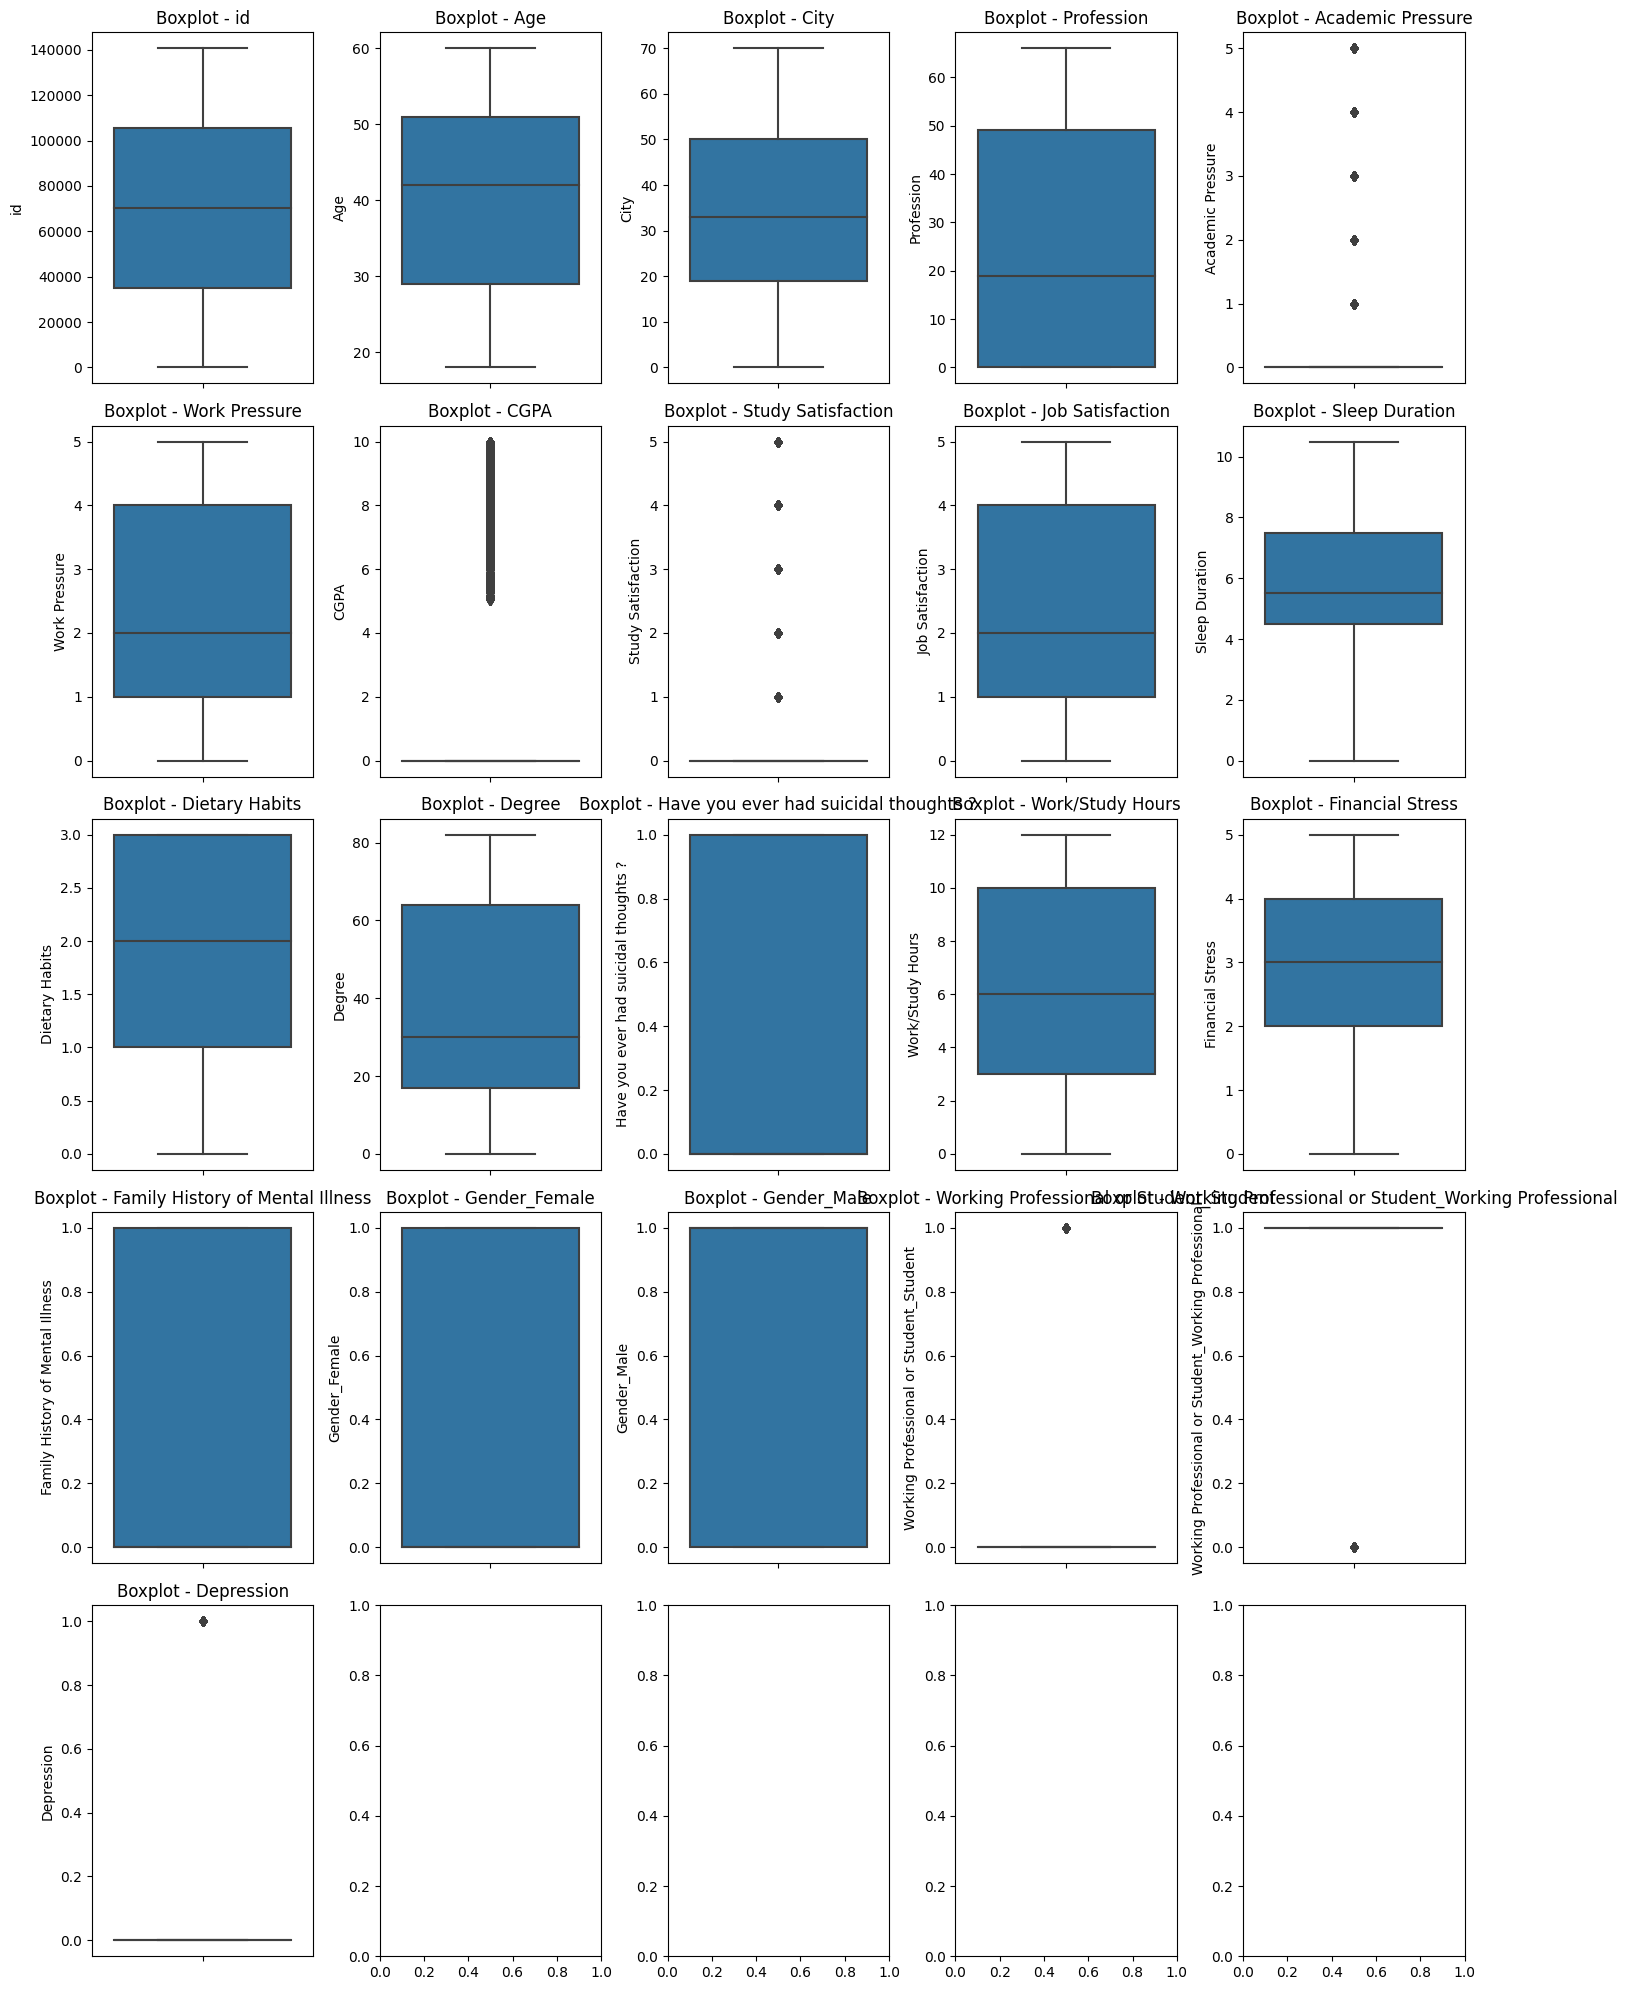

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

all_numeric_cols = train.select_dtypes(include=[np.number]).columns
columns_to_plot = all_numeric_cols
# columns_to_plot = train.select_dtypes(include=[np.number]).columns.tolist()

num_cols = 5
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows)) 

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=train[column], ax=axes[i])
    axes[i].set_title(f"Boxplot - {column}")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Profession'}>,
        <Axes: title={'center': 'Academic Pressure'}>],
       [<Axes: title={'center': 'Work Pressure'}>,
        <Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Study Satisfaction'}>,
        <Axes: title={'center': 'Job Satisfaction'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Dietary Habits'}>,
        <Axes: title={'center': 'Degree'}>,
        <Axes: title={'center': 'Have you ever had suicidal thoughts ?'}>,
        <Axes: title={'center': 'Work/Study Hours'}>,
        <Axes: title={'center': 'Financial Stress'}>],
       [<Axes: title={'center': 'Family History of Mental Illness'}>,
        <Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Gender_Male'}>,
        <Axes: title={'center': 'Working Professional or Student_Student'}>

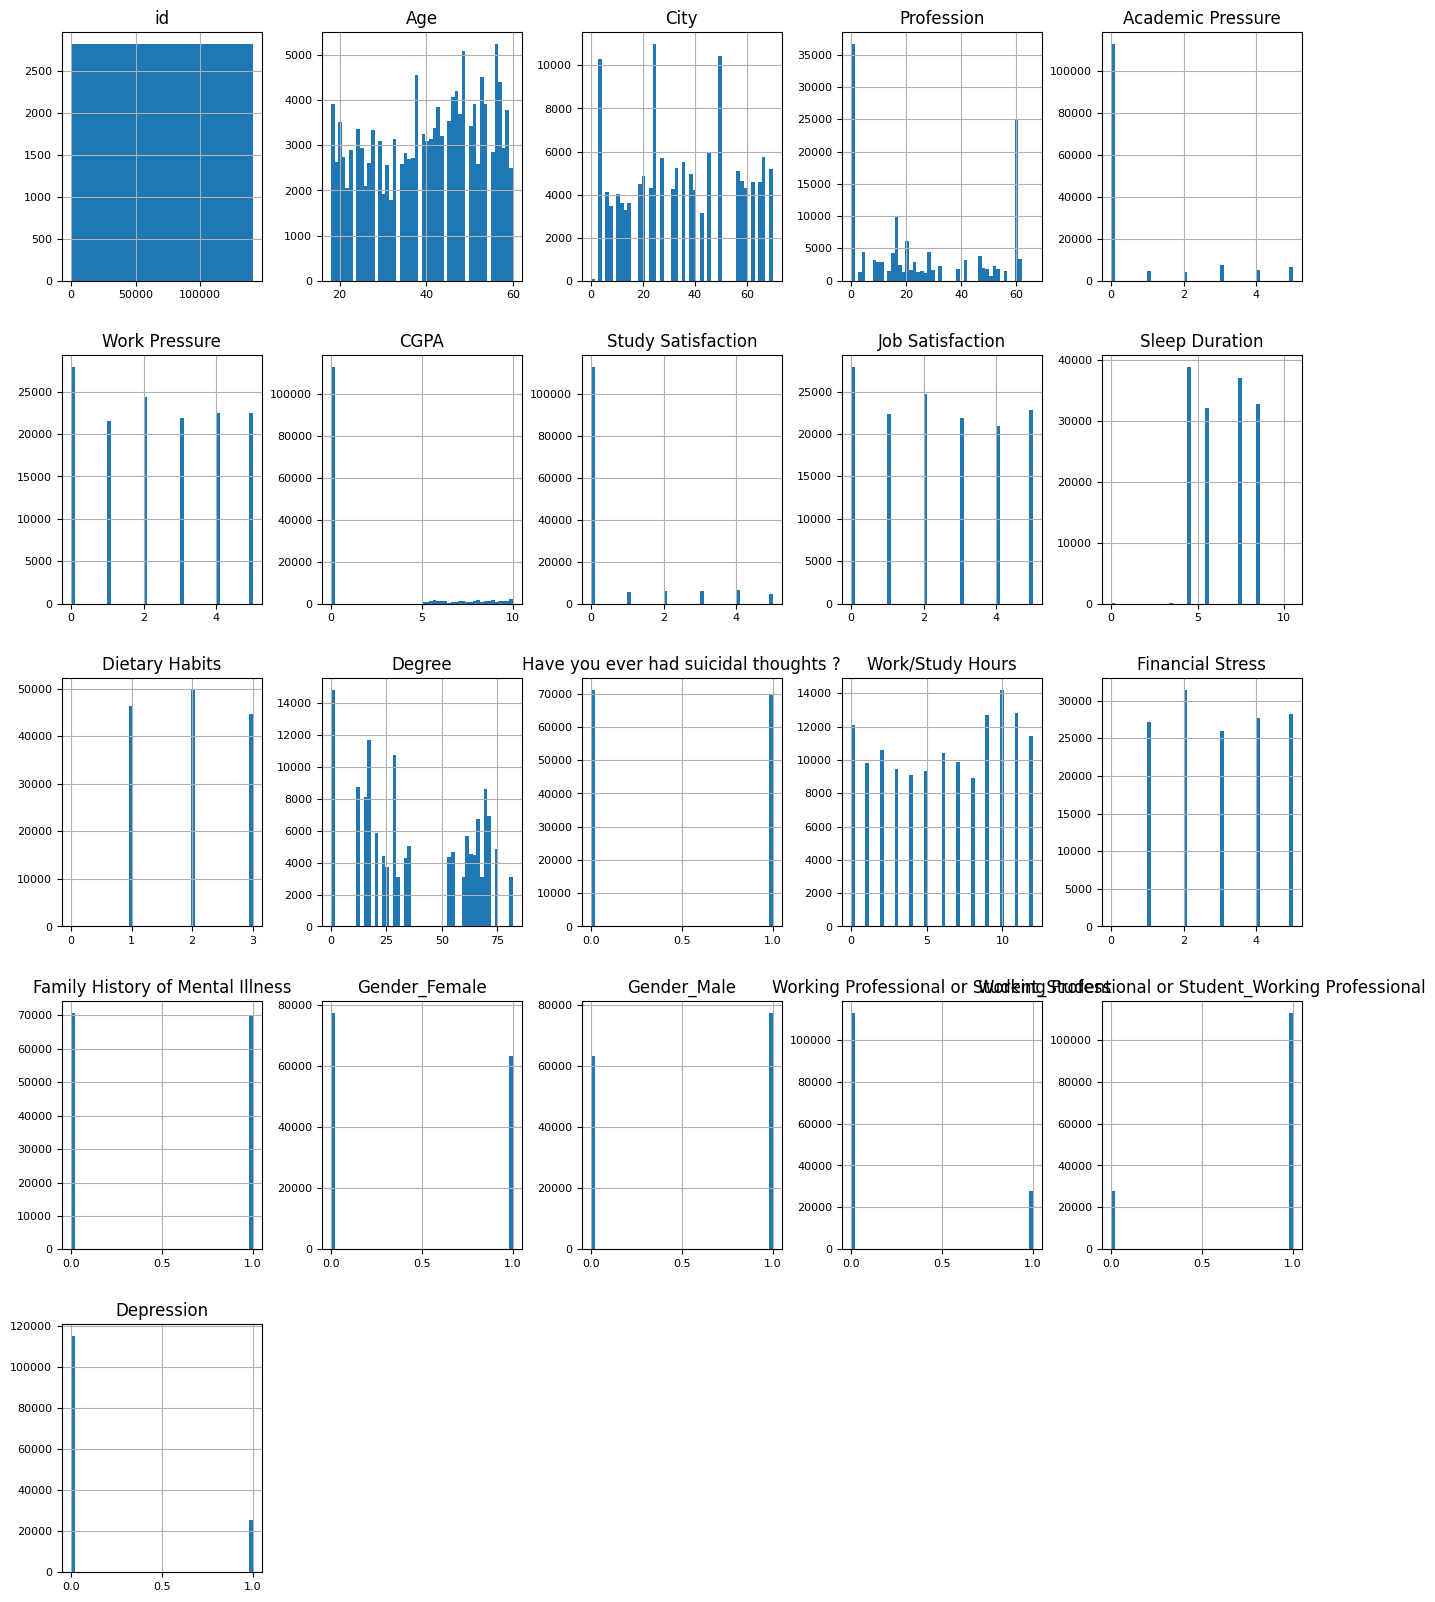

In [45]:
train.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8,)


In [46]:
columns_to_drop = ['Name']
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

In [47]:
test

,id,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Gender_Female,Gender_Male,Working Professional or Student_Student,Working Professional or Student_Working Professional
0,140700,53.0,70,30,0.0,2.0,0.00,0.0,5.0,4.5,2,54,0,9.0,3.0,1,0.0,1.0,0.0,1.0
1,140701,58.0,27,21,0.0,2.0,0.00,0.0,4.0,4.5,2,17,0,6.0,4.0,0,1.0,0.0,0.0,1.0
2,140702,53.0,23,60,0.0,4.0,0.00,0.0,1.0,7.5,2,13,1,12.0,4.0,0,0.0,1.0,0.0,1.0
3,140703,23.0,50,0,5.0,0.0,6.84,1.0,0.0,8.5,2,36,1,10.0,4.0,0,1.0,0.0,1.0,0.0
4,140704,47.0,24,60,0.0,5.0,0.00,0.0,5.0,7.5,2,29,1,3.0,4.0,0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,49.0,23,48,0.0,3.0,0.00,0.0,5.0,4.5,2,36,1,2.0,2.0,1,1.0,0.0,0.0,1.0
93796,234496,29.0,4,48,0.0,5.0,0.00,0.0,1.0,7.5,2,30,1,11.0,3.0,1,0.0,1.0,0.0,1.0
93797,234497,24.0,70,0,1.0,0.0,7.51,4.0,0.0,7.5,2,24,0,7.0,1.0,0,0.0,1.0,1.0,0.0
93798,234498,23.0,24,41,0.0,4.0,0.00,0.0,2.0,5.5,3,26,1,7.0,5.0,1,1.0,0.0,0.0,1.0


<Figure size 800x500 with 0 Axes>

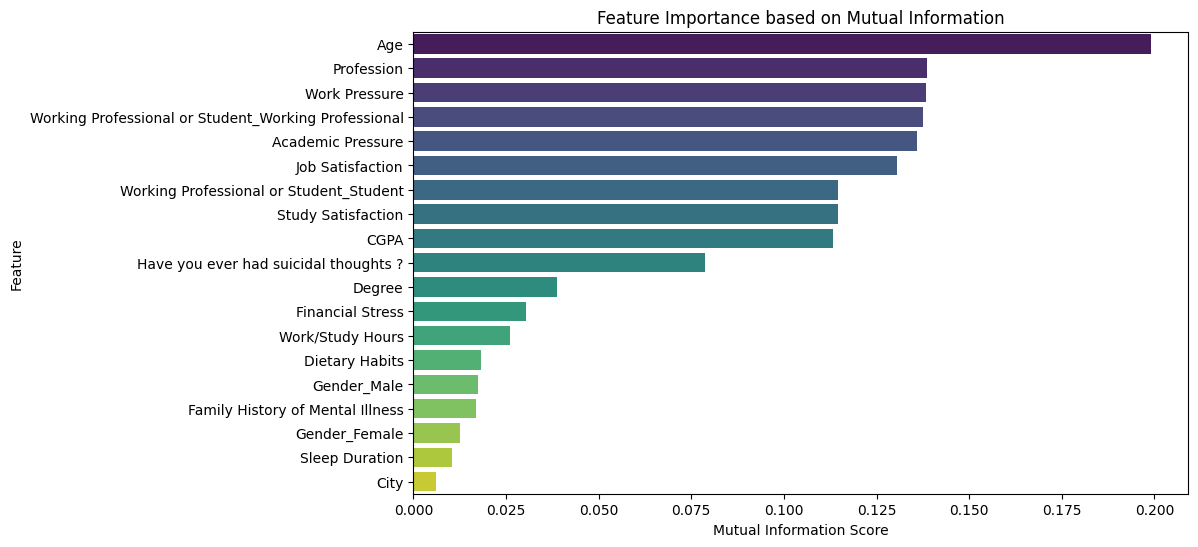

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Define Function to Plot MI Scores
def plot_mi_scores(mi_scores, feature_names=None):
    mi_df = pd.DataFrame({"Feature": feature_names, "MI Score": mi_scores})
    mi_df = mi_df.sort_values(by="MI Score", ascending=False)  # Sort scores

    plt.figure(figsize=(10, 6))
    sns.barplot(x="MI Score", y="Feature", data=mi_df, palette="viridis")
    
    plt.xlabel("Mutual Information Score")
    plt.ylabel("Feature")
    plt.title("Feature Importance based on Mutual Information")
    plt.show()

# Compute MI Scores
X = train.drop(columns=['Depression', 'id'], axis=1)  
y = train['Depression']

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Plot MI Scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores, feature_names=X.columns)

In [535]:
# # Create new features
# train['Job_Balance'] = train['Job Satisfaction'] / (train['Work Pressure'] + 1)
# train['Academic_Balance'] = train['Study Satisfaction'] / (train['Academic Pressure'] + 1)

# # Drop the original columns
# train.drop(columns=['Job Satisfaction', 'Work Pressure', 'Study Satisfaction', 'Academic Pressure'], inplace=True)

# # Apply the same transformations to the test set
# test['Job_Balance'] = test['Job Satisfaction'] / (test['Work Pressure'] + 1)
# test['Academic_Balance'] = test['Study Satisfaction'] / (test['Academic Pressure'] + 1)

# # Drop the original columns from the test set
# test.drop(columns=['Job Satisfaction', 'Work Pressure', 'Study Satisfaction', 'Academic Pressure'], inplace=True)

In [536]:
from sklearn.feature_selection import mutual_info_classif

X = train.drop(columns=['Depression','id'], axis=1)  
y = train['Depression']

mi_scores = mutual_info_classif(X, y)

print(mi_scores)
# print(mi_scores.tail(20))  



[0.19836427 0.004084   0.13826392 0.13738344 0.13754947 0.11243419
 0.11672373 0.13105981 0.00815401 0.01851547 0.0387352  0.08000722
 0.02515209 0.03132814 0.0145816  0.01101331 0.01745868 0.11291212
 0.13732991]


In [49]:
# columns_to_drop = ['Gender_Female','Gender_Male','City']
columns_to_drop = ['City']

train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

In [538]:
# columns_to_drop = ['Sleep Duration','Family History of Mental Illness']
# train = train.drop(columns=columns_to_drop)
# test = test.drop(columns=columns_to_drop)
 

In [540]:
# train.dtypes

In [541]:
# describe = pd.DataFrame(index=train.columns.to_list())
# describe['data type'] = train.dtypes
# describe['count'] = train.count()
# describe['unique'] = train.nunique()
# describe['null'] = train.isnull().sum()
# describe

In [50]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Depression'], axis=1)  
y = train['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
numeric_df_train = X_train.select_dtypes(include=['number'])
numeric_df_test = X_test.select_dtypes(include=['number'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(numeric_df_train)
X_test_scaled = scaler.transform(numeric_df_test)

X_train = pd.DataFrame(X_train_scaled, columns=numeric_df_train.columns, index=numeric_df_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=numeric_df_test.columns, index=numeric_df_test.index)

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [57]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9364605543710022


In [59]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=500, 
    max_depth=None, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    max_features='sqrt', 
    random_state=42, 
    class_weight='balanced'
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500, random_state=42)

In [62]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9357853589196873


In [78]:
from xgboost import XGBClassifier
import numpy as np

# Calculate scale_pos_weight manually
neg, pos = np.bincount(y_train)  # Count negatives (0s) and positives (1s)
scale_pos_weight = neg / pos  # Ratio of majority to minority class

model = XGBClassifier(
    n_estimators=300,       # Number of boosting rounds
    max_depth=9,            # Adjust based on tuning
    learning_rate=0.2,      # Learning rate
    min_child_weight=1,     # Similar to min_samples_leaf
    subsample=0.9,          # Uses 80% of data per boosting round
    colsample_bytree=0.9,   # Uses 80% of features per tree
    gamma=0.3,                # Regularization term
    reg_lambda=1,           # L2 regularization
    reg_alpha=0.1,            # L1 regularization
    objective='binary:logistic', # Binary classification
    scale_pos_weight=scale_pos_weight, # Corrected weight for class imbalance
    random_state=42,
    use_label_encoder=False  # Avoids warning in newer versions
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [83]:
y_pred = model.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9320540156361052


In [81]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Define hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Perform randomized search
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,  # Number of different combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit the model
xgb_random_search.fit(X_train, y_train)

# Best parameters
print("Best XGBoost Parameters:", xgb_random_search.best_params_)

Best XGBoost Parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


In [82]:
from xgboost import XGBClassifier
import numpy as np

# Calculate scale_pos_weight manually
neg, pos = np.bincount(y_train)  # Count negatives (0s) and positives (1s)
scale_pos_weight = neg / pos  # Ratio of majority to minority class

model = XGBClassifier(
    n_estimators=500,       # Number of boosting rounds
    max_depth=3,            # Adjust based on tuning
    learning_rate=0.1,      # Learning rate
    min_child_weight=1,     # Similar to min_samples_leaf
    subsample=0.6,          # Uses 80% of data per boosting round
    colsample_bytree=1.0,   # Uses 80% of features per tree
    gamma=0,                # Regularization term
    reg_lambda=1,           # L2 regularization
    reg_alpha=0.1,            # L1 regularization
    objective='binary:logistic', # Binary classification
    scale_pos_weight=scale_pos_weight, # Corrected weight for class imbalance
    random_state=42,
    use_label_encoder=False  # Avoids warning in newer versions
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [84]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9180525941719971


In [86]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Initialize LightGBM classifier
model = lgb.LGBMClassifier(
    boosting_type='gbdt', 
    objective='binary',  
    n_estimators=300,  
    max_depth=9,  
    learning_rate=0.1,  
    min_child_weight=1,  
    subsample=0.9,  
    colsample_bytree=0.9,  
    reg_lambda=1,  
    reg_alpha=0.1,  
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181352 -> initscore=-1.507213
[LightGBM] [Info] Start training from score -1.507213


LGBMClassifier(colsample_bytree=0.9, max_depth=9, min_child_weight=1,
               n_estimators=300, objective='binary', random_state=42,
               reg_alpha=0.1, reg_lambda=1, subsample=0.9)

In [87]:
y_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.93909026297086


In [89]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Define hyperparameter grid
lgb_param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'num_leaves': [20, 31, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'lambda_l1': [0, 0.1, 0.5, 1.0],  # L1 Regularization
    'lambda_l2': [0, 0.1, 0.5, 1.0]   # L2 Regularization
}

# Perform randomized search
lgb_random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_param_grid,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the model
lgb_random_search.fit(X_train, y_train)

# Best parameters
print("Best LightGBM Parameters:", lgb_random_search.best_params_)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Number

In [109]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Initialize LightGBM classifier
model = lgb.LGBMClassifier(
    boosting_type='gbdt', 
    objective='binary',  
    n_estimators=700,  
    max_depth=9,  
    learning_rate=0.05,  
    min_child_weight=1,  
    subsample=0.9,  
    colsample_bytree=0.9,  
    reg_lambda=1,  
    reg_alpha=0.1,
    num_leaves=20,
    feature_fraction=0.6,
    bagging_fraction=0.6,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.9 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.9 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 19
[LightGBM] [In

LGBMClassifier(bagging_fraction=0.6, colsample_bytree=0.9, feature_fraction=0.6,
               learning_rate=0.05, max_depth=9, min_child_weight=1,
               n_estimators=700, num_leaves=20, objective='binary',
               random_state=42, reg_alpha=0.1, reg_lambda=1, subsample=0.9)

In [110]:
y_pred = model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.9 will be ignored. Current value: bagging_fraction=0.6


In [111]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy Score: {accuracy}")

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.9 will be ignored. Current value: bagging_fraction=0.6
Accuracy Score: 0.9396588486140725


In [97]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize CatBoost classifier with some reasonable defaults
# model = CatBoostClassifier(
#     iterations=500,       # Number of boosting rounds
#     depth=8,              # Tree depth
#     learning_rate=0.1,    # Step size
#     l2_leaf_reg=3,        # L2 regularization
#     border_count=32,      # Number of splits for feature binarization
#     loss_function='Logloss', # Binary classification
#     eval_metric='Accuracy',
#     random_seed=42,
#     verbose=100  # Show training updates every 100 iterations
# )
model = CatBoostClassifier(verbose=0, random_state=42)

# Train the model
model.fit(X_train, y_train)

In [99]:
y_pred = model.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9388415067519545


In [101]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the CatBoost model
cat_model = CatBoostClassifier(verbose=0)  # verbose=0 to avoid excessive logging

# Define hyperparameter grid
cat_param_grid = {
    'iterations': [100, 300, 500, 700],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9],  # L2 Regularization
    'border_count': [32, 64, 128],  # Number of splits for numerical features
    'bagging_temperature': [0.0, 0.5, 1.0],  # Controls overfitting
    'random_strength': [1, 2, 5, 10]  # Feature randomness
}

# Perform randomized search
cat_random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_param_grid,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the model
cat_random_search.fit(X_train, y_train)

# Best parameters
print("Best CatBoost Parameters:", cat_random_search.best_params_)

Best CatBoost Parameters: {'random_strength': 2, 'learning_rate': 0.05, 'l2_leaf_reg': 9, 'iterations': 500, 'depth': 6, 'border_count': 128, 'bagging_temperature': 0.5}


In [106]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize CatBoost classifier with some reasonable defaults
model = CatBoostClassifier(
    iterations=500,       # Number of boosting rounds
    depth=6,              # Tree depth
    learning_rate=0.05,    # Step size
    l2_leaf_reg=9,        # L2 regularization
    border_count=128,      # Number of splits for feature binarization
    loss_function='Logloss', # Binary classification
    eval_metric='Accuracy',
    bagging_temperature= 0.5,
    random_strength=2,
    random_seed=42,
    verbose=100  # Show training updates every 100 iterations
)

# Train the model
model.fit(X_train, y_train)

0:	learn: 0.9217928	total: 16.6ms	remaining: 8.31s
100:	learn: 0.9384240	total: 1.72s	remaining: 6.79s
200:	learn: 0.9403962	total: 3.39s	remaining: 5.04s
300:	learn: 0.9413113	total: 5.06s	remaining: 3.34s
400:	learn: 0.9423330	total: 6.71s	remaining: 1.66s
499:	learn: 0.9433991	total: 8.33s	remaining: 0us


In [107]:
y_pred = model.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9390547263681592


In [112]:
model.fit(X,y)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.9 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.9 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Number of positive: 25567, number of negative: 115133
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 140700, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181713 -> initscore=-1.5047

LGBMClassifier(bagging_fraction=0.6, colsample_bytree=0.9, feature_fraction=0.6,
               learning_rate=0.05, max_depth=9, min_child_weight=1,
               n_estimators=700, num_leaves=20, objective='binary',
               random_state=42, reg_alpha=0.1, reg_lambda=1, subsample=0.9)

In [113]:
y_pred = model.predict(test)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.9 will be ignored. Current value: bagging_fraction=0.6


In [114]:
submission = pd.DataFrame({
    'id': test['id'],  
    'Depression': y_pred  
})

submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!


In [115]:
submission = pd.read_csv("submission.csv")
submission

,id,Depression
0,140700,0.0
1,140701,0.0
2,140702,0.0
3,140703,1.0
4,140704,0.0
...,...,...
93795,234495,0.0
93796,234496,1.0
93797,234497,0.0
93798,234498,1.0


In [1]:
!git config --global user.name "sathsaraniii"
!git config --global user.email "sathsarani.22@cse.mrt.ac.lk"

In [ ]:
!git clone https://github.com/sathsaraniii/Predicting-Depression-ML-Model.git

Cloning into 'Predicting-Depression-ML-Model'...
Username for 'https://github.com': 